<a href="https://colab.research.google.com/github/ethan-yoo/2022_aiffel_exp/blob/main/E09_Sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jun  7 01:53:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

# **E09: ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôîÎ¶¨Î∑∞ Í∞êÏÑ±Î∂ÑÏÑùÌïòÍ∏∞**

> **Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò: https://github.com/e9t/nsmc**

## **00. INDEX**

>01. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
>
>02. Îç∞Ïù¥ÌÑ∞Î°úÎçî Íµ¨ÏÑ±
>> Ïù∏ÏΩîÎî©/ÎîîÏΩîÎî© Ìï®Ïàò ÏÉùÏÑ±
>03. Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù & Í∞ÄÍ≥µ
>> Îç∞Ïù¥ÌÑ∞ÏÖã Î¨∏Ïû• Í∏∏Ïù¥ ÌôïÏù∏
>>
>> ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏßÄÏ†ï
>>
>> Ìå®Îî© Ï≤òÎ¶¨
>04. Î™®Îç∏ Íµ¨ÏÑ± Î∞è validation set Íµ¨ÏÑ±
>> RNN
>>
>> CNN
>>
>> Global Max Pooling
>>
>> validation set split
>05. Î™®Îç∏ ÌõàÎ†®
>06. ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî
>07. ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù
>> RNN
>>
>> CNN
>>
>> GMP
>08. ÌïúÍµ≠Ïñ¥ word2vec ÏûÑÎ≤†Îî© ÌôúÏö© ÏÑ±Îä• Í∞úÏÑ†
>> ÏÑ±Îä• Í∞úÏÑ† ÌôïÏù∏
>>
>> model rebuild
>>
>> model retrain
>09. Î™®Îç∏ Í∞úÏÑ†
>> batch size Ï°∞Ï†à
>>
>> ÏÑ±Îä• ÎπÑÍµê ÏãúÍ∞ÅÌôî
>>
> 10. ÌöåÍ≥†

---

## **01. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏
import pandas as pd
import numpy as np
import tensorflow as tf
import konlpy
from konlpy.tag import Mecab
import gensim
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from gensim.models.keyedvectors import Word2VecKeyedVectors
from tensorflow.keras.initializers import Constant

print(pd.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.5
0.6.0
3.6.0


In [ ]:
# ÌååÏùº read

train_data = pd.read_table('/content/drive/MyDrive/AIFFEL/E09/data/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/AIFFEL/E09/data/ratings_test.txt')

train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

---

## **02. Îç∞Ïù¥ÌÑ∞Î°úÎçî Íµ¨ÏÑ±**

In [ ]:
# Mecab Ïò§Î•ò Ìï¥Í≤∞
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [806 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe am

In [ ]:
# MecabÏúºÎ°ú ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞
tokenizer = Mecab()
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def load_data(train_data, test_data, num_words):

    # Ï§ëÎ≥µ ÏßÄÏö∞Í∏∞
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # ÌÜ†ÌÅ∞Ìôî & Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence)
        temp_X = [word for word in temp_X if not word in stopwords]
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence)
        temp_X = [word for word in temp_X if not word in stopwords]
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
num_words = 10000
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data, num_words)

print('Done!')

Done!


### **Ïù∏ÏΩîÎî©/ÎîîÏΩîÎî© Ìï®Ïàò ÏÉùÏÑ±**

In [ ]:
# idx2wrd
index_to_word = {index:word for word, index in word_to_index.items()}

# Î™®Îì† Î¨∏Ïû•ÏùÄ <BOS>Î°ú ÏãúÏûë
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# Ïó¨Îü¨ Í∞ú Î¨∏Ïû• Î¶¨Ïä§Ìä∏ + ÎîïÏÖîÎÑàÎ¶¨ = Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôò
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# ÏõåÎìúÎ≤°ÌÑ∞ ÎîîÏΩîÎî©
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]Î•º ÌÜµÌï¥ <BOS>Î•º Ï†úÏô∏

# Ïó¨Îü¨ Í∞ú Î¨∏Ïû• ÎîîÏΩîÎî©
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

print('Done!')

Done!


## **03.Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è Í∞ÄÍ≥µ**

### **Îç∞Ïù¥ÌÑ∞ÏÖã Î¨∏Ïû• Í∏∏Ïù¥ ÌôïÏù∏**

In [ ]:
total_text_len = list(X_train) + list(X_test)

# ÌÖçÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ Î¨∏Ïû• Í∏∏Ïù¥ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
num_tokens = [len(tokens) for tokens in total_text_len]
num_tokens = np.array(num_tokens)

# Î¨∏Ïû•Í∏∏Ïù¥Ïùò ÌèâÍ∑†Í∞í, ÏµúÎåÄÍ∞í, ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
print('ÌèâÍ∑†: ', np.mean(num_tokens))
print('ÏµúÎåÄÍ∞í: ', np.max(num_tokens))
print('ÌëúÏ§ÄÌé∏Ï∞®: ', np.std(num_tokens))

ÌèâÍ∑†:  15.969376315021577
ÏµúÎåÄÍ∞í:  116
ÌëúÏ§ÄÌé∏Ï∞®:  12.843535456326455


### **ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏßÄÏ†ï**

In [ ]:
# ÏµúÎåÄ Í∏∏Ïù¥ = ÌèâÍ∑† + ÌëúÏ§ÄÌé∏Ï∞®*2
maxlen = int(np.mean(num_tokens) + np.std(num_tokens)*2)

print('malen: ', maxlen)
print('Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò {}%Í∞Ä Ìè¨Ìï®Îê®'.format(round(np.sum(num_tokens < maxlen)/len(num_tokens)*100, 3)))

malen:  41
Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 93.065%Í∞Ä Ìè¨Ìï®Îê®


### **Ìå®Îî© Ï≤òÎ¶¨**

In [ ]:
# RNN Î™®Îç∏Ïóê ÎßûÍ≤å pre ÏòµÏÖòÏúºÎ°ú Ìå®Îî©
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                       value=word_to_index['<PAD>'],
                                                       padding='pre',
                                                       maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                      value=word_to_index['<PAD>'],
                                                      padding='pre',
                                                      maxlen=maxlen)

print('Done!')

Done!


## **04. Î™®Îç∏ Íµ¨ÏÑ± Î∞è validation set Íµ¨ÏÑ±**

### **RNN**

In [ ]:
# Îã®Ïñ¥ÏÇ¨Ï†Ñ
vocab_size = 10000

# ÏõåÎìúÏûÑÎ≤†Îî© Î≤°ÌÑ∞
word_vec_dim = 16

# relu, sigmoid RNN
model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vec_dim, input_shape=(None,)))
model_rnn.add(tf.keras.layers.LSTM(8))
model_rnn.add(tf.keras.layers.Dense(8, activation='relu'))
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, None, 16)          160000    
                                                                 
 lstm_19 (LSTM)              (None, 8)                 800       
                                                                 
 dense_54 (Dense)            (None, 8)                 72        
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [ ]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Embedding(vocab_size, word_vec_dim, input_shape=(None,)))
model_cnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(5))
model_cnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_cnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_cnn.add(tf.keras.layers.Dense(8, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, None, 16)          160000    
                                                                 
 conv1d_8 (Conv1D)           (None, None, 16)          1808      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, None, 16)         0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, None, 16)          1808      
                                                                 
 global_max_pooling1d_8 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_56 (Dense)            (None, 8)               

### **Global Max Pooling**

In [ ]:
model_gmp = tf.keras.Sequential()
model_gmp.add(tf.keras.layers.Embedding(vocab_size, word_vec_dim, input_shape=(None,)))
model_gmp.add(tf.keras.layers.GlobalMaxPooling1D())
model_gmp.add(tf.keras.layers.Dense(8, activation='relu'))
model_gmp.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_gmp.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, None, 16)          160000    
                                                                 
 global_max_pooling1d_9 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


### **validation set split**

In [ ]:
partial_x, x_val, partial_y, y_val = tts(X_train, y_train, test_size=0.2, random_state=17)

print('Done!')

Done!


## **05. Î™®Îç∏ ÌõàÎ†®**

> Î™®Îç∏ ÌõàÎ†® & ÏãúÍ∞ÅÌôî Ìï®ÏàòÎäî ÌôçÏÑ±ÌòÑÎãò [ÍπÉÌóàÎ∏å](https://github.com/seonghyun97/Aiffel_Exploration/blob/master/%5BE-09%5DMovieReview.ipynb)Î•º Ï∞∏Í≥†ÌïòÏòÄÏùå

In [ ]:
# visualization Loss & Accuracy by epochs
def visualization(history):
    history_dict = history.history

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)
    
    # Loss
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.clf()
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# modelÏùÑ ÌõàÎ†®ÏãúÌÇ§Í≥† ÌèâÍ∞ÄÌï¥Î≥¥Îäî Ìï®Ïàò
def fitting_machine(model,epoch):
    # model compile
    model = model
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    # model training and recording history
    history = model.fit(partial_x,
                        partial_y,
                        epochs=epoch,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=1)
    # print result
    results = model.evaluate(X_test,  y_test, verbose=2)
    print(f'\nThis is {model.name}\nLoss: {results[0]}\nAccurancy: {results[1]}\n')
    
    return history

print('Done!')

Done!


In [ ]:
# rnn
rnn_history = fitting_machine(model_rnn, 7)

Epoch 1/7
229/229 [==============================] - 4s 9ms/step - loss: 0.4954 - accuracy: 0.7867 - val_loss: 0.3695 - val_accuracy: 0.8410
Epoch 2/7
229/229 [==============================] - 2s 7ms/step - loss: 0.3372 - accuracy: 0.8577 - val_loss: 0.3559 - val_accuracy: 0.8448
Epoch 3/7
229/229 [==============================] - 2s 7ms/step - loss: 0.3148 - accuracy: 0.8680 - val_loss: 0.3573 - val_accuracy: 0.8429
Epoch 4/7
229/229 [==============================] - 2s 7ms/step - loss: 0.3027 - accuracy: 0.8743 - val_loss: 0.3570 - val_accuracy: 0.8436
Epoch 5/7
229/229 [==============================] - 2s 7ms/step - loss: 0.2934 - accuracy: 0.8781 - val_loss: 0.3590 - val_accuracy: 0.8461
Epoch 6/7
229/229 [==============================] - 2s 7ms/step - loss: 0.2853 - accuracy: 0.8823 - val_loss: 0.3618 - val_accuracy: 0.8443
Epoch 7/7
229/229 [==============================] - 2s 7ms/step - loss: 0.2767 - accuracy: 0.8852 - val_loss: 0.3644 - val_accuracy: 0.8441
1537/1537 - 4

In [ ]:
# cnn
cnn_history = fitting_machine(model_cnn, 7)

Epoch 1/7
229/229 [==============================] - 2s 6ms/step - loss: 0.5044 - accuracy: 0.7431 - val_loss: 0.3689 - val_accuracy: 0.8383
Epoch 2/7
229/229 [==============================] - 1s 5ms/step - loss: 0.3288 - accuracy: 0.8600 - val_loss: 0.3578 - val_accuracy: 0.8448
Epoch 3/7
229/229 [==============================] - 1s 5ms/step - loss: 0.2938 - accuracy: 0.8785 - val_loss: 0.3493 - val_accuracy: 0.8491
Epoch 4/7
229/229 [==============================] - 1s 5ms/step - loss: 0.2646 - accuracy: 0.8926 - val_loss: 0.3555 - val_accuracy: 0.8487
Epoch 5/7
229/229 [==============================] - 1s 5ms/step - loss: 0.2346 - accuracy: 0.9084 - val_loss: 0.3716 - val_accuracy: 0.8479
Epoch 6/7
229/229 [==============================] - 1s 5ms/step - loss: 0.2015 - accuracy: 0.9243 - val_loss: 0.3958 - val_accuracy: 0.8438
Epoch 7/7
229/229 [==============================] - 1s 5ms/step - loss: 0.1694 - accuracy: 0.9392 - val_loss: 0.4407 - val_accuracy: 0.8376
1537/1537 - 3

In [ ]:
# gmp
gmp_history = fitting_machine(model_gmp, 7)

Epoch 1/7
229/229 [==============================] - 2s 7ms/step - loss: 0.5925 - accuracy: 0.7524 - val_loss: 0.4471 - val_accuracy: 0.8160
Epoch 2/7
229/229 [==============================] - 2s 7ms/step - loss: 0.3810 - accuracy: 0.8392 - val_loss: 0.3723 - val_accuracy: 0.8349
Epoch 3/7
229/229 [==============================] - 1s 5ms/step - loss: 0.3273 - accuracy: 0.8616 - val_loss: 0.3605 - val_accuracy: 0.8419
Epoch 4/7
229/229 [==============================] - 1s 4ms/step - loss: 0.2991 - accuracy: 0.8752 - val_loss: 0.3591 - val_accuracy: 0.8437
Epoch 5/7
229/229 [==============================] - 1s 4ms/step - loss: 0.2785 - accuracy: 0.8855 - val_loss: 0.3628 - val_accuracy: 0.8438
Epoch 6/7
229/229 [==============================] - 1s 4ms/step - loss: 0.2614 - accuracy: 0.8934 - val_loss: 0.3695 - val_accuracy: 0.8419
Epoch 7/7
229/229 [==============================] - 1s 4ms/step - loss: 0.2468 - accuracy: 0.9006 - val_loss: 0.3775 - val_accuracy: 0.8404
1537/1537 - 2

## **06. ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî**

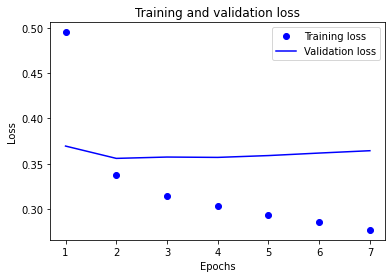

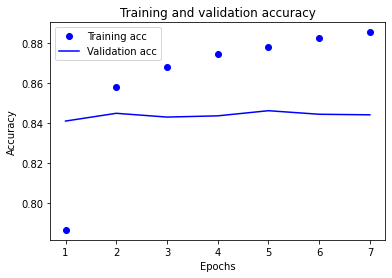

In [ ]:
# rnn
visualization(rnn_history)

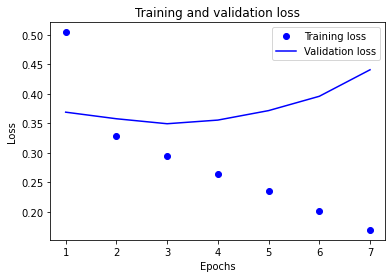

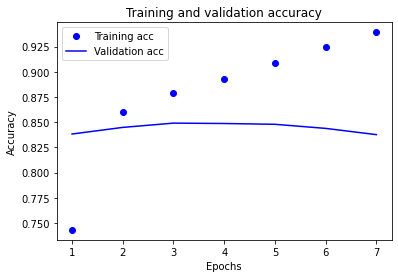

In [ ]:
# cnn
visualization(cnn_history)

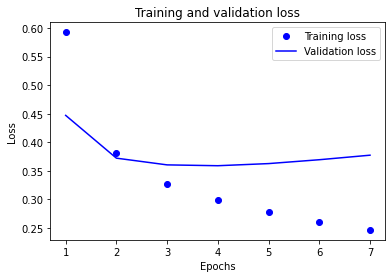

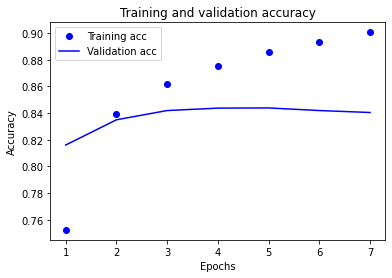

In [ ]:
# gmp
visualization(gmp_history)

## **07. ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù**

### **RNN**

In [ ]:
embedding_layer = model_rnn.layers[0]
weights = embedding_layer.get_weights()[0]
vocab_size, word_vector_dim = weights.shape[0], weights.shape[1]

word2vec_file_path = '/content/drive/MyDrive/AIFFEL/E09/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

vectors = model_rnn.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['Ïª¥Ìì®ÌÑ∞']
vector

array([ 0.04925205,  0.03105517,  0.04113806,  0.03907989,  0.02524313,
       -0.02584787,  0.00586793,  0.02041914,  0.02035635, -0.02582937,
       -0.00240666, -0.01327032, -0.04486413,  0.02928497, -0.01800389,
       -0.03624937], dtype=float32)

In [ ]:
word_vectors.similar_by_word('ÏÇ¨Îûë')

[('ÏÑ∏Ïö∞', 0.9722590446472168),
 ('Ìï¥ÏÑù', 0.9712495803833008),
 ('ÎåÄÎ™ÖÏÇ¨', 0.970474123954773),
 ('Í∞ÄÎ≤ºÏõÄ', 0.9663954973220825),
 ('Ìï¥ÎÉà', 0.9643445014953613),
 ('Íµ¨Îß§', 0.9630481004714966),
 ('ÏµúÎØºÏãù', 0.9629431366920471),
 ('ÏÇ¨Ïã§Í∞ê', 0.9615585207939148),
 ('ÌëúÌïúÎã§', 0.9611522555351257),
 ('Î¶ø', 0.9610471129417419)]

‚ñ≤ Ïó∞Í¥ÄÏù¥ ÎÜíÏïÑ Î≥¥Ïù¥Îäî Îã®Ïñ¥ÎèÑ ÏûàÍ≥†, Í∑∏Î†áÏßÄ ÏïäÏùÄ Îã®Ïñ¥ÎèÑ Î≥¥ÏûÖÎãàÎã§.

In [ ]:
word_vectors.similar_by_word('ÏµúÍ≥†')

[('ÏµúÍ≥†Î¥â', 0.9795593023300171),
 ('ÏãúÎ¶∞', 0.9777662754058838),
 ('ÏùºÌíà', 0.9770609140396118),
 ('ÏãúÏõêÏãúÏõê', 0.9765172004699707),
 ('„Ö†„Ö†„Ö†„Ö†', 0.9760062098503113),
 ('Í∑∏Î¶¨ÏõÄ', 0.975368320941925),
 ('Î®πÎ®π', 0.9750996232032776),
 ('Ïä¨ÌçºÏöî', 0.9741134643554688),
 ('ÏïÑÎ¶ÑÎã§ÏõåÏöî', 0.9725567698478699),
 ('good', 0.9719381928443909)]

In [ ]:
word_vectors.similar_by_word('Ïã§Îßù')

[('ÌòêÏò§', 0.988378643989563),
 ('Ï°∏Ïûë', 0.9859365224838257),
 ('Í¥ëÏ£º', 0.9843347072601318),
 ('Ï†ÄÏßà', 0.9835510849952698),
 ('Î∞úÏó∞Í∏∞', 0.9835274815559387),
 ('Ïò¨Î¶¨Î≤Ñ', 0.9809094667434692),
 ('ÎãπÌô©', 0.9807533025741577),
 ('.,,', 0.9801250696182251),
 ('Î≥ÑÎ£®', 0.9798504114151001),
 ('ÏïÑÏò§', 0.9794697165489197)]

‚ñ≤ Î∂ÄÏ†ïÏ†ÅÏù∏ Îã®Ïñ¥Îäî ÎπÑÍµêÏ†Å Ïûò Ïû°Îäî Í≤É Í∞ôÏäµÎãàÎã§.

In [ ]:
word_vectors.similar_by_word('Í∞êÎèô')

[('Ï¢ã', 0.9513593316078186),
 ('Îì≠ÎãàÎã§', 0.9479687809944153),
 ('Í∞ë', 0.9197641611099243),
 ('Ïß±', 0.9164116382598877),
 ('Í±∏Ïûë', 0.9160469174385071),
 ('Î©ãÏßÑ', 0.9140505194664001),
 ('Î™ÖÌôî', 0.9068397879600525),
 ('Ï§ÑÎ¶¨Ïó£', 0.906275749206543),
 ('Ïù¥ÎªêÏöî', 0.9021357297897339),
 ('Îßò', 0.902101457118988)]

‚ñ≤ Ï§ÑÎ¶¨Ïó£, Î™ÖÌôî, Í±∏Ïûë Ï†ïÎèÑÍπåÏßÄÎäî Ïñ¥Îäê Ï†ïÎèÑ Ïù¥Ìï¥Í∞Ä ÎêòÎÑ§Ïöî.

Ï¢ã(ÏïÑÎßà 'Ï¢ãÎã§, Ï¢ãÏùÄ, Ï¢ã-'Ïù¥Í≤†Ï£†) Ï≤òÎüº ÏûòÎ†§ÎÇòÏò§Îäî Îã®Ïñ¥Îì§ÎèÑ Î≥¥ÏûÖÎãàÎã§.

### **CNN**

In [ ]:
embedding_layer = model_cnn.layers[0]
weights = embedding_layer.get_weights()[0]
vocab_size, word_vector_dim = weights.shape[0], weights.shape[1]

word2vec_file_path = '/content/drive/MyDrive/AIFFEL/E09/data/word2vec.txt'
f2 = open(word2vec_file_path, 'w')
f2.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

vectors = model_cnn.get_weights()[0]
for i in range(4,vocab_size):
    f2.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f2.close()

word_vectors2 = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector2 = word_vectors2['Ïª¥Ìì®ÌÑ∞']
vector2

array([ 0.06486587, -0.10900137, -0.03470463, -0.05267156,  0.03083559,
       -0.00535413, -0.16405332, -0.02929867, -0.03303585,  0.15115935,
        0.08604542, -0.02110196, -0.11203799,  0.01062421,  0.00051838,
       -0.0124598 ], dtype=float32)

In [ ]:
word_vectors2.similar_by_word('ÏÇ¨Îûë')

[('ÏÜêÏÉâÏóÜ', 0.8764262199401855),
 ('Ïó∞Îßê', 0.8744235634803772),
 ('ÏπúÍ∑º', 0.8731305599212646),
 ('Í∞êÍ≤©', 0.872710108757019),
 ('Îã®ÏàúÌûà', 0.865827739238739),
 ('„Öë', 0.8655436635017395),
 ('Î∫ê', 0.8591469526290894),
 ('Îß§Ìä∏Î¶≠Ïä§', 0.85252845287323),
 ('ÏûêÏ°¥Ïã¨', 0.8523714542388916),
 ('ÏïÑÌÇ§Îùº', 0.8522768020629883)]

In [ ]:
word_vectors2.similar_by_word('ÏµúÍ≥†')

[('ÌÉÅÏõî', 0.9377676844596863),
 ('Ï±îÌîºÏñ∏', 0.9361021518707275),
 ('Ï≤òÏ†à', 0.9247820377349854),
 ('ÎèÖÎèÑ', 0.9221043586730957),
 ('Ïª¥Î∞±', 0.9168250560760498),
 ('Í∞êÌÉÑÏÇ¨', 0.9154782891273499),
 ('Î∞ïÏã†Ìòú', 0.9134947657585144),
 ('ÏïàÎã§', 0.9124402403831482),
 ('Ïò§ÎûòÎèÑÎ°ù', 0.9079256653785706),
 ('Ï´ÑÍπÉ', 0.9053670167922974)]

In [ ]:
word_vectors2.similar_by_word('Ïã§Îßù')

[('Ïó≠Í≤®Ïõå', 0.9589092135429382),
 ('ÎßõÏóÜ', 0.9570329785346985),
 ('ÎÇöÏãú', 0.9565696120262146),
 ('Ïã§Ìå®Ïûë', 0.9542481303215027),
 ('.-', 0.9474246501922607),
 ('Í∑∏ÎßåÎëê', 0.9443625211715698),
 ('ÎîîÏßà', 0.9436076283454895),
 ('ÎçîÎü¨ÏõåÏßÄ', 0.9368395805358887),
 ('Ïã¨Ìïú', 0.9323322772979736),
 ('ÌåùÏΩò', 0.9317879676818848)]

In [ ]:
word_vectors2.similar_by_word('Í∞êÎèô')

[('ÏµúÏã†', 0.8860321044921875),
 ('ÏπúÍ∑º', 0.8769975900650024),
 ('Î™ÖÎ∂àÌóàÏ†Ñ', 0.8466136455535889),
 ('ÏèòÏö∞', 0.8413317799568176),
 ('Îã®Ïó∞', 0.83614581823349),
 ('Ï£ΩÏó¨Ïïº', 0.827816367149353),
 ('Îß§ÏóºÎ∞©', 0.826114296913147),
 ('Í∂åÎ†•', 0.8247969150543213),
 ('ÎøåÎìØ', 0.8243390917778015),
 ('on', 0.8223711252212524)]

‚ñ≤ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú RNN Î™®Îç∏Ïóê ÎπÑÌï¥ Ï°∞Í∏à Îã®Ï°∞Î°≠Í±∞ÎÇò ÎöùÎöù ÎÅäÍ∏∞Îäî ÎäêÎÇåÏùò Îã®Ïñ¥Í∞Ä ÎßéÎÑ§Ïöî.

.- Ï≤òÎüº Ïì∏Îç∞ÏóÜÎäî Î¨∏ÏûêÍ∞Ä Ïû°ÌûàÍ∏∞ÎèÑ Ìï©ÎãàÎã§.

### **GMP**

In [ ]:
embedding_layer = model_gmp.layers[0]
weights = embedding_layer.get_weights()[0]
vocab_size, word_vector_dim = weights.shape[0], weights.shape[1]

word2vec_file_path = '/content/drive/MyDrive/AIFFEL/E09/data/word2vec.txt'
f3 = open(word2vec_file_path, 'w')
f3.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

vectors = model_gmp.get_weights()[0]
for i in range(4,vocab_size):
    f3.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f3.close()

word_vectors3 = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector3 = word_vectors3['Ïª¥Ìì®ÌÑ∞']
vector3

array([ 0.04051085, -0.10213774,  0.05686174, -0.06496321, -0.06799877,
       -0.04035151, -0.02655781,  0.02340064, -0.05558763, -0.08202055,
        0.06677703, -0.04659525,  0.01858167, -0.04926745, -0.09415722,
       -0.07917783], dtype=float32)

In [ ]:
word_vectors3.similar_by_word('ÏÇ¨Îûë')

[('ÏøµÌë∏', 0.9115050435066223),
 ('ÎÑòÏÇ¨Î≤Ω', 0.9043145775794983),
 ('Ï§Ä', 0.8952242136001587),
 ('Ï∂§Ï∂î', 0.8929998278617859),
 ('ÌÖåÏù¥ÌÅ¨', 0.881513237953186),
 ('ÏÜåÌÜµ', 0.8745929598808289),
 ('ÎÑàÎ®∏', 0.8742336630821228),
 ('5', 0.8717709183692932),
 ('Ïù¥Î†á', 0.8684521913528442),
 ('ÏõÉ', 0.8672879934310913)]

In [ ]:
word_vectors3.similar_by_word('ÏµúÍ≥†')

[('Ïä¨ÌçºÏöî', 0.7560446262359619),
 ('ÏßÄÎÇòÍ∞à', 0.7445442080497742),
 ('ÌèâÎì±', 0.7253490090370178),
 ('Ïû•ÌïôÏö∞', 0.7052932977676392),
 ('Ìé∏Ìïú', 0.6974267959594727),
 ('Í≥ÑÌöç', 0.695301353931427),
 ('ÏπúÍ∑º', 0.6932628750801086),
 ('ÏóêÏù¥Î¶¨Ïñ∏', 0.6902977824211121),
 ('ÏÑ±Í∏∞', 0.6901509165763855),
 ('ÌÉúÏñë', 0.6829642057418823)]

In [ ]:
word_vectors3.similar_by_word('Ïã§Îßù')

[('Ïû¨Ïïô', 0.941999614238739),
 ('Ïó∞ÏÜçÍ∑π', 0.9182400703430176),
 ('ÏÑ§Ï†ï', 0.9101114273071289),
 ('sm', 0.9051221013069153),
 ('ÏÇ¨ÎùºÏ°å', 0.9047355651855469),
 ('Í∞ÄÏúÑ', 0.9009018540382385),
 ('Î∂àÏö∞', 0.8986130356788635),
 ('Ïû¨ÌÉï', 0.8891335725784302),
 ('Ï†úÏ†ïÏã†', 0.8878833055496216),
 ('Ïï†Ïì¥', 0.8875678777694702)]

In [ ]:
word_vectors3.similar_by_word('Í∞êÎèô')

[('ÏãúÏ†à', 0.9348336458206177),
 ('ÏúºÎ©¥ÏÑú', 0.9020490646362305),
 ('ÏïÖÏó≠', 0.8981361389160156),
 ('Ïñ¥Îñ®Íπå', 0.8979471921920776),
 ('Î¨¥ÏãúÎ¨¥Ïãú', 0.8854531645774841),
 ('Ìï¥Ìîº', 0.8838043212890625),
 ('Î™©ÏÇ¨', 0.8804962635040283),
 ('ÏÇ¨Îûå', 0.8745806217193604),
 ('Í≤ÅÎÇ¥', 0.8664819002151489),
 ('Í∞ïÌïò', 0.8628451824188232)]

‚ñ≤ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú gmpÎäî Î™® ÏïÑÎãàÎ©¥ ÎèÑÏùò ÌäπÏÑ±ÏùÑ Î≥¥ÏûÖÎãàÎã§.

accuracy ÏàòÏπòÎßå Î≥¥Î©¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•Ï≤òÎüº Î≥¥Ïù¥ÏßÄÎßå Ïã§Ï†úÎ°úÎäî ÏÑ±Îä•Ïù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ Ï¢ãÏßÄ ÏïäÏäµÎãàÎã§.

## **08. ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© ÌôúÏö©ÌïòÏó¨ ÏÑ±Îä• Í∞úÏÑ†**

In [ ]:
# gensim Î≤ÑÏ†Ñ ÌôïÏù∏
print(gensim.__version__)

3.6.0


### **ÏÑ±Îä• Í∞úÏÑ† ÌôïÏù∏**

In [ ]:
word2vec_path = '/content/drive/MyDrive/AIFFEL/E09/data/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
vector = word2vec['Ïª¥Ìì®ÌÑ∞']
vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([-1.517628  , -0.8935504 , -1.4352998 ,  1.5069847 , -1.5178334 ,
        1.1542678 , -2.94064   ,  1.1850045 ,  0.19959009, -1.5288961 ,
       -1.7067502 , -2.1892095 , -0.20728938, -2.2606812 , -2.2283888 ,
        0.32318738, -0.2845471 , -0.07731772, -0.86269003, -1.1722927 ,
       -0.91062415,  0.8440715 ,  0.903278  , -0.84685427,  0.7023384 ,
       -2.1920419 , -0.47571626, -0.60159504, -0.68860835,  0.18944737,
        0.5319404 ,  0.73058116, -0.9658133 , -1.0123725 , -0.36183038,
        2.5851305 ,  0.66589296, -1.7231252 ,  1.7576753 ,  0.88845277,
        1.5791365 , -4.430691  ,  0.36731872,  0.69481534, -0.46041563,
        1.742655  , -1.5077016 ,  0.72209424, -0.04532204, -0.6557301 ,
       -0.71276623,  0.26522732, -0.17656395, -2.4720876 , -0.845565  ,
        0.23591152,  1.3414925 ,  0.77577615, -2.289371  , -0.8078124 ,
        1.4359473 ,  0.22882733, -1.08867   ,  1.2607764 , -1.7469797 ,
        0.06542054,  0.39896825, -0.3160832 , -1.7257563 ,  0.54

In [ ]:
word2vec.similar_by_word('Í∞êÎèô')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('Í∞êÎ™Ö', 0.7177015542984009),
 ('Í∞êÍ≤©', 0.6908231973648071),
 ('Ïã§Îßù', 0.6267645359039307),
 ('Í∞êÌôî', 0.6191877126693726),
 ('Í∞êÌÉÑ', 0.6140128374099731),
 ('Ïπ≠Ï∞¨', 0.6059398055076599),
 ('Ï°¥Í≤Ω', 0.6032299995422363),
 ('ÏûêÍ∑π', 0.594598650932312),
 ('Í∞êÎ≥µ', 0.5902734994888306),
 ('Ìò∏Ïùë', 0.5850393772125244)]

In [ ]:
word2vec.similar_by_word('ÏµúÍ≥†')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('ÏµúÎåÄ', 0.5721614360809326),
 ('ÏµúÍ∞ï', 0.5064552426338196),
 ('Ïú†ÏùºÌïú', 0.46688494086265564),
 ('ÏùºÎ•ò', 0.46184951066970825),
 ('ÏµúÏïÖ', 0.4529539942741394),
 ('ÏµúÏó∞ÏÜå', 0.45037323236465454),
 ('Îû≠ÌÇπ', 0.4485436677932739),
 ('Ï†úÏùºÏùò', 0.44647401571273804),
 ('ÏµúÏ¥à', 0.44505739212036133),
 ('ÏµúÏÉÅ', 0.4345606565475464)]

‚ñ≤ Ïò§... ÏÑ±Îä•Ïù¥ Ìôï Ïò¨ÎùºÍ∞Ñ Í±∏ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

### **model rebuild**

In [ ]:
vector.shape

(200,)

In [ ]:
# Îã®Ïñ¥ÏÇ¨Ï†Ñ
vocab_size = 10000

# ÏõåÎìúÏûÑÎ≤†Îî© Î≤°ÌÑ∞
word_vec_dim = 200

embedding_matrix = np.random.rand(vocab_size, word_vec_dim)

# embedding_matrixÏóê Word2Vec ÏõåÎìú Î≤°ÌÑ∞Î•º Îã®Ïñ¥ ÌïòÎÇòÏî©ÎßàÎã§ ÏàúÏÑúÎåÄÎ°ú Ïπ¥Ìîº
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

print('Done!')

Done!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [ ]:
embedding_matrix.shape

(10000, 200)

In [ ]:
# RNN_new
new_rnn = tf.keras.Sequential()
new_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vec_dim,
                                      embeddings_initializer=Constant(embedding_matrix),
                                      input_length=maxlen,
                                      trainable=True))
new_rnn.add(tf.keras.layers.LSTM(8))
new_rnn.add(tf.keras.layers.Dense(8, activation='relu'))
new_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

new_rnn.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 41, 200)           2000000   
                                                                 
 lstm_13 (LSTM)              (None, 8)                 6688      
                                                                 
 dense_42 (Dense)            (None, 8)                 72        
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,006,769
Trainable params: 2,006,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# CNN_new
new_cnn = tf.keras.Sequential()
new_cnn.add(tf.keras.layers.Embedding(vocab_size, word_vec_dim,
                                      embeddings_initializer=Constant(embedding_matrix),
                                      input_length=maxlen,
                                      trainable=True))
new_cnn.add(tf.keras.layers.LSTM(8))
new_cnn.add(tf.keras.layers.Dense(8, activation='relu'))
new_cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

new_cnn.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 41, 200)           2000000   
                                                                 
 lstm_14 (LSTM)              (None, 8)                 6688      
                                                                 
 dense_44 (Dense)            (None, 8)                 72        
                                                                 
 dense_45 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,006,769
Trainable params: 2,006,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# GMP_new
new_gmp = tf.keras.Sequential()
new_gmp.add(tf.keras.layers.Embedding(vocab_size, word_vec_dim,
                                      embeddings_initializer=Constant(embedding_matrix),
                                      input_length=maxlen,
                                      trainable=True))
new_gmp.add(tf.keras.layers.LSTM(8))
new_gmp.add(tf.keras.layers.Dense(8, activation='relu'))
new_gmp.add(tf.keras.layers.Dense(1, activation='sigmoid'))

new_gmp.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 41, 200)           2000000   
                                                                 
 lstm_15 (LSTM)              (None, 8)                 6688      
                                                                 
 dense_46 (Dense)            (None, 8)                 72        
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,006,769
Trainable params: 2,006,769
Non-trainable params: 0
_________________________________________________________________


### **model retrain**

In [ ]:
# rnn
new_rnn_hist = fitting_machine(new_rnn, 7)

Epoch 1/7
229/229 [==============================] - 4s 11ms/step - loss: 0.5400 - accuracy: 0.7182 - val_loss: 0.4272 - val_accuracy: 0.8063
Epoch 2/7
229/229 [==============================] - 2s 9ms/step - loss: 0.3702 - accuracy: 0.8406 - val_loss: 0.3701 - val_accuracy: 0.8373
Epoch 3/7
229/229 [==============================] - 2s 9ms/step - loss: 0.3222 - accuracy: 0.8655 - val_loss: 0.3602 - val_accuracy: 0.8451
Epoch 4/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2981 - accuracy: 0.8777 - val_loss: 0.3600 - val_accuracy: 0.8470
Epoch 5/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2799 - accuracy: 0.8865 - val_loss: 0.3613 - val_accuracy: 0.8492
Epoch 6/7
229/229 [==============================] - 2s 9ms/step - loss: 0.2671 - accuracy: 0.8932 - val_loss: 0.3620 - val_accuracy: 0.8480
Epoch 7/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2528 - accuracy: 0.8996 - val_loss: 0.3737 - val_accuracy: 0.8472
1537/1537 - 

In [ ]:
# cnn
new_cnn_hist = fitting_machine(new_cnn, 7)

Epoch 1/7
229/229 [==============================] - 4s 11ms/step - loss: 0.5236 - accuracy: 0.7324 - val_loss: 0.4093 - val_accuracy: 0.8185
Epoch 2/7
229/229 [==============================] - 2s 8ms/step - loss: 0.3639 - accuracy: 0.8441 - val_loss: 0.3677 - val_accuracy: 0.8416
Epoch 3/7
229/229 [==============================] - 2s 8ms/step - loss: 0.3205 - accuracy: 0.8662 - val_loss: 0.3589 - val_accuracy: 0.8446
Epoch 4/7
229/229 [==============================] - 2s 9ms/step - loss: 0.2971 - accuracy: 0.8764 - val_loss: 0.3545 - val_accuracy: 0.8487
Epoch 5/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2770 - accuracy: 0.8867 - val_loss: 0.3597 - val_accuracy: 0.8490
Epoch 6/7
229/229 [==============================] - 2s 9ms/step - loss: 0.2622 - accuracy: 0.8931 - val_loss: 0.3613 - val_accuracy: 0.8482
Epoch 7/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2511 - accuracy: 0.8991 - val_loss: 0.3698 - val_accuracy: 0.8480
1537/1537 - 

In [ ]:
# gmp
new_gmp_hist = fitting_machine(new_gmp, 7)

Epoch 1/7
229/229 [==============================] - 4s 11ms/step - loss: 0.5163 - accuracy: 0.7376 - val_loss: 0.4038 - val_accuracy: 0.8197
Epoch 2/7
229/229 [==============================] - 2s 8ms/step - loss: 0.3606 - accuracy: 0.8451 - val_loss: 0.3677 - val_accuracy: 0.8371
Epoch 3/7
229/229 [==============================] - 2s 9ms/step - loss: 0.3210 - accuracy: 0.8650 - val_loss: 0.3588 - val_accuracy: 0.8437
Epoch 4/7
229/229 [==============================] - 2s 11ms/step - loss: 0.2996 - accuracy: 0.8749 - val_loss: 0.3611 - val_accuracy: 0.8454
Epoch 5/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2826 - accuracy: 0.8842 - val_loss: 0.3625 - val_accuracy: 0.8457
Epoch 6/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2687 - accuracy: 0.8907 - val_loss: 0.3631 - val_accuracy: 0.8451
Epoch 7/7
229/229 [==============================] - 2s 8ms/step - loss: 0.2568 - accuracy: 0.8969 - val_loss: 0.3679 - val_accuracy: 0.8460
1537/1537 -

‚ñ≤ Î™©Ìëú accuracy 0.85Î≥¥Îã§ Ï°∞Í∏à Î™®ÏûêÎûçÎãàÎã§.

batch_sizeÎ•º Ï°∞Ï†àÌï¥ÏÑú Î™©ÌëúÎ•º Îã¨ÏÑ±Ìï¥Î¥ÖÏãúÎã§.

---

## **09. Î™®Îç∏ Í∞úÏÑ†**


### **batch size Ï°∞Ï†à**

In [ ]:
def fitting_machine2(model,epoch):
    # model compile
    model = model
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    # model training and recording history
    history = model.fit(partial_x,
                        partial_y,
                        epochs=epoch,
                        batch_size=32,
                        validation_data=(x_val, y_val),
                        verbose=1)
    # print result
    results = model.evaluate(X_test,  y_test, verbose=2)
    print(f'\nThis is {model.name}\nLoss: {results[0]}\nAccurancy: {results[1]}\n')
    
    return history

print('Done!')

Done!


In [ ]:
# RNN_new2
new_rnn2 = tf.keras.Sequential()
new_rnn2.add(tf.keras.layers.Embedding(vocab_size, word_vec_dim,
                                      embeddings_initializer=Constant(embedding_matrix),
                                      input_length=maxlen,
                                      trainable=True))
new_rnn2.add(tf.keras.layers.LSTM(16))
new_rnn2.add(tf.keras.layers.Dense(8, activation='relu'))
new_rnn2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

new_rnn2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 41, 200)           2000000   
                                                                 
 lstm_18 (LSTM)              (None, 16)                13888     
                                                                 
 dense_52 (Dense)            (None, 8)                 136       
                                                                 
 dense_53 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,014,033
Trainable params: 2,014,033
Non-trainable params: 0
_________________________________________________________________


‚ñ≤ ÌååÎùºÎØ∏ÌÑ∞ ÏàòÍ∞Ä ÎäòÏñ¥ÎÇ¨ÏäµÎãàÎã§. ÎãπÏó∞Ìûà ÏÑ±Îä•ÎèÑ Ïò¨ÎùºÍ∞ÄÍ≤†Ï£†?

In [ ]:
# rnn2
new_rnn_hist2 = fitting_machine2(new_rnn2, 7)

Epoch 1/7
3655/3655 [==============================] - 24s 6ms/step - loss: 0.4004 - accuracy: 0.8184 - val_loss: 0.3537 - val_accuracy: 0.8445
Epoch 2/7
3655/3655 [==============================] - 22s 6ms/step - loss: 0.3100 - accuracy: 0.8695 - val_loss: 0.3381 - val_accuracy: 0.8544
Epoch 3/7
3655/3655 [==============================] - 22s 6ms/step - loss: 0.2738 - accuracy: 0.8870 - val_loss: 0.3413 - val_accuracy: 0.8540
Epoch 4/7
3655/3655 [==============================] - 22s 6ms/step - loss: 0.2443 - accuracy: 0.9003 - val_loss: 0.3492 - val_accuracy: 0.8548
Epoch 5/7
3655/3655 [==============================] - 22s 6ms/step - loss: 0.2171 - accuracy: 0.9131 - val_loss: 0.3705 - val_accuracy: 0.8485
Epoch 6/7
3655/3655 [==============================] - 23s 6ms/step - loss: 0.1933 - accuracy: 0.9238 - val_loss: 0.3845 - val_accuracy: 0.8520
Epoch 7/7
3655/3655 [==============================] - 22s 6ms/step - loss: 0.1710 - accuracy: 0.9349 - val_loss: 0.4036 - val_accuracy:

‚ñ≤ Î™©ÌëúÎ°ú ÌñàÎçò accuracy 0.85Î•º Îã¨ÏÑ±ÌñàÏäµÎãàÎã§.

### **ÏÑ±Îä• ÎπÑÍµê ÏãúÍ∞ÅÌôî**

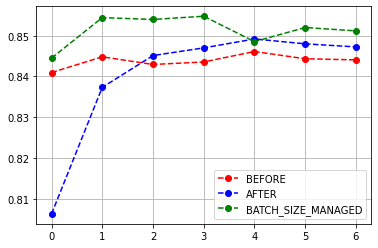

In [ ]:
plt.plot(rnn_history.history['val_accuracy'], '--o', color='red', label='BEFORE')
plt.plot(new_rnn_hist.history['val_accuracy'], '--o', color='blue', label='AFTER')
plt.plot(new_rnn_hist2.history['val_accuracy'], '--o', color='green', label='BATCH_SIZE_MANAGED')
plt.legend()
plt.grid()

‚ñ≤ epoch=2Î∂ÄÌÑ∞ ÌïúÍµ≠Ïñ¥ word2vec Î™®Îç∏Ïù¥ ÌûòÏùÑ Î∞úÌúòÌï©ÎãàÎã§.

Îòê, Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎ•º Ï§ÑÏó¨ÏÑú Îçî ÏÑ∏Î∞ÄÌïòÍ≤å Î≥¥ÎèÑÎ°ù Ï°∞Ï†ïÌï¥Ï£ºÎ©¥ Ï≤òÏùåÎ∂ÄÌÑ∞ Îã§Î•∏ Îëê Î™®Îç∏Ïóê ÎπÑÌï¥ Ìõ®Ïî¨ ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

---

## **10. ÌöåÍ≥†**

- ÏïÑÏßÅ Going Deeper Í∞ÄÍ∏∞ Ï†ÑÏù∏Îç∞ Ïä¨Ïä¨ Ïñ¥Î†§Ïö¥ ÎÇ¥Ïö©Ïù¥ ÎÇòÏò§Í∏∞ ÏãúÏûëÌïòÎäî Í≤É Í∞ôÏäµÎãàÎã§.
- Î∞ÄÎ¶∞ ÌéÄÎçîÎ©òÌÑ∏ ÎÖ∏Îìú Ï§ëÏóê Ïïà ÏùΩÏùÄ Î∂ÄÎ∂ÑÏù¥ ÏûàÏñ¥ÏÑú Ïù¥Î≤à ÏùµÏä§Î•º ÌïòÎ©¥ÏÑú Í∞ôÏù¥ Ï∞∏Í≥†Ìï¥ÏÑú ÏßÑÌñâÌñàÏäµÎãàÎã§.
- ÏµúÍ∑º ÏùµÏä§Îì§ÏùÑ ÌïòÎã§Î≥¥Î©¥ CS Îä•Î†•Ïùò Î∂ÄÏ°±Ìï®Ïóê Ï†êÏ†ê Îçî ÏïïÎ∞ïÍ∞êÏù¥ Îì≠ÎãàÎã§. ÏñºÎßà Ï†ÑÏóê Î∞±Ï§ÄÏùÑ ÏãúÏûëÌñàÎäîÎç∞... ÎèÑÏõÄÏù¥ ÎêêÏúºÎ©¥ Ï¢ãÍ≤†ÎÑ§Ïöî.
- ÏûÑÎ≤†Îî© Î∂ÄÎ∂Ñ Ïù¥Ìï¥Í∞Ä ÏïÑÏßÅ 100% ÏôÑÎ≤ΩÌïòÏßÄ ÏïäÏùÄ Í≤É Í∞ôÏäµÎãàÎã§. Î∞ëÏãúÎî• Ï±Ö Îã§Ïãú Îí§Ï†∏Î≥¥Îü¨ Í∞ëÎãàÎã§....üò¢

**ÎÅù!**